# Make distribution and whatnot

In [1]:
# Source the desired function and generate the table
#source("./TReNA/inst/unitTests//test_TReNA.R")
#ls()

In [2]:
# Failing that, load the data directly
# load("./TReNA/inst/unitTests/ampAD_Distributions.RData")

## Inspect trends within each solver

The same solvers were used with 3 different types of data:

1. As is; a matrix with RPKM reads
2. log2; the as-is matrix transformed via log2(mtx-0.0001)
3. asinh; the as-is matrix transformed via asinh(mtx)

We are interested in the question: how does transforming the data affect the correlations between genes? We'll look at the top genes found by the solvers, sorted by their Pearson correlation with the target gene. First, let's look at LASSO:

In [3]:
head(tbl.all[,c(1,2,3,4,11)],20)

,gene,lasso.as.is,lasso.log2,lasso.asinh,gene.cor
9,HLF,0.7928153980,0.211671527,0.1218555282,0.9232394
4,STAT4,2.7234147543,0.062369774,0.1668978520,0.9047599
42,SATB1,NA,NA,NA,0.8628270
14,SATB2,0.1170162587,0.208034764,0.2352948098,0.8423299
23,ATF2,NA,0.122286098,NA,0.8278686
5,FOXP2,2.5415262709,0.134731271,0.1065497711,0.8196172
11,TSHZ2,0.6712651520,0.135604740,0.0891001802,0.7704362
36,DRGX,NA,0.004729671,NA,0.7309450
1,HDX,11.1120492315,NA,NA,0.7241906
25,FOXJ3,NA,-0.100088093,NA,0.7198456


As we would expect from LASSO, many genes are missing coefficients because they've been shrunken out of the model. What we wouldn't necessarily expect is that the remaining coefficients don't necessarily line up well with the Pearson correlation, or with one another. To quantify that, let us compare the LASSO coefficients between transformation types.

In [4]:
# For each pairwise comparison, find correlation for complete cases
idx <- complete.cases(tbl.all[,2:3])
cor(tbl.all$lasso.as.is[idx],tbl.all$lasso.log2[idx])

idx <- complete.cases(tbl.all[,3:4])
cor(tbl.all$lasso.log2[idx],tbl.all$lasso.asinh[idx])

idx <- complete.cases(tbl.all[,c(2,4)])
cor(tbl.all$lasso.as.is[idx],tbl.all$lasso.asinh[idx])


[1] 0.4230019

[1] 0.8187165

[1] 0.4553364

Correlation between the coefficients found for the "as-is" data with either transformed data type aren't particularly high, but the two transformed matrices are in much better agreement. We can similarly look at the results from using Bayes Spike as the solver:

In [5]:
head(tbl.all[,c(1,5:7,11)],20)

,gene,bs.as.is,bs.log2,bs.asinh,gene.cor
9,HLF,0.615993902,4.397926e-01,8.021380e-02,0.9232394
4,STAT4,1.028224197,2.345882e-01,1.600971e-01,0.9047599
42,SATB1,-0.508837252,-2.398520e-06,4.719466e-06,0.8628270
14,SATB2,1.116708683,1.717411e-04,2.818277e-02,0.8423299
23,ATF2,0.966270108,6.846773e-05,2.383583e-02,0.8278686
5,FOXP2,3.969474560,9.103155e-05,2.170502e-01,0.8196172
11,TSHZ2,1.034221304,2.462877e-01,9.666456e-02,0.7704362
36,DRGX,-0.027522731,3.288638e-05,-3.878668e-06,0.7309450
1,HDX,8.397799560,1.693965e-05,8.489143e-05,0.7241906
25,FOXJ3,-0.017184619,3.524913e-05,2.630947e-01,0.7198456


From visual inspection, these coefficients are a bit all over the map in terms of magnitude and sign. Additionally, most of the coefficients for the log-transformed, and many from the asinh-transformed, are quite small. Let's look at these correlations:

In [6]:
cor(tbl.all$bs.as.is,tbl.all$bs.log2)
cor(tbl.all$bs.as.is,tbl.all$bs.asinh)
cor(tbl.all$bs.log2,tbl.all$bs.asinh)

[1] 0.04931118

[1] 0.1140762

[1] 0.1960297

There appears to be very little agreement between any of the Bayes Spike coefficients, particularly between the as-is and log-transformed matrices.

Let's finish our survey of the solvers by looking at the Random Forest scores:

In [7]:
head(tbl.all[,c(1,8:11)],20)

,gene,rf.as.is,rf.log2,rf.asinh,gene.cor
9,HLF,1279410.716,59.3208829,25.0821372,0.9232394
4,STAT4,657266.220,48.3055177,21.2427661,0.9047599
42,SATB1,536031.869,21.9056028,11.5280330,0.8628270
14,SATB2,414212.621,24.0466254,13.2971485,0.8423299
23,ATF2,141242.778,3.1732559,3.0178257,0.8278686
5,FOXP2,131526.319,6.1324362,2.7998044,0.8196172
11,TSHZ2,73002.899,5.6631952,2.8863433,0.7704362
36,DRGX,55309.044,7.9213840,3.6591379,0.7309450
1,HDX,57903.645,1.2843353,0.8112355,0.7241906
25,FOXJ3,28277.163,0.5174434,0.2449619,0.7198456


This looks a lot more in line with what we would expect; the Random Forest scores look to decrease in size almost monotonically along with the Pearson correlations. Furthermore, they look to do so regardless of whether or not the data have been transformed, although the coefficient sizes vary quite a bit. Let's follow up with the correlations between different transformations.

In [8]:
cor(tbl.all$rf.as.is,tbl.all$rf.log2)
cor(tbl.all$rf.as.is,tbl.all$rf.asinh)
cor(tbl.all$rf.log2,tbl.all$rf.asinh)

[1] 0.9656457

[1] 0.9606471

[1] 0.9941999

The correlation coefficients between matrix types suggests very high agreement in all cases, and nearly identical trends when using log-transformed and asinh-transformed data. 



## Inspect Trends Between Solvers

From looking at the within-solvers comparisons, it seems evident that we can probably expect some major differences between solver types. Let's look first at the as-is data across solvers

In [9]:
head(tbl.all[,c(1,2,5,8,11)],20)
idx <- complete.cases(tbl.all[,2])
cor(tbl.all$lasso.as.is[idx],tbl.all$bs.as.is[idx])
cor(tbl.all$lasso.as.is[idx],tbl.all$rf.as.is[idx])
cor(tbl.all$bs.as.is,tbl.all$rf.as.is)

,gene,lasso.as.is,bs.as.is,rf.as.is,gene.cor
9,HLF,0.7928153980,0.615993902,1279410.716,0.9232394
4,STAT4,2.7234147543,1.028224197,657266.220,0.9047599
42,SATB1,NA,-0.508837252,536031.869,0.8628270
14,SATB2,0.1170162587,1.116708683,414212.621,0.8423299
23,ATF2,NA,0.966270108,141242.778,0.8278686
5,FOXP2,2.5415262709,3.969474560,131526.319,0.8196172
11,TSHZ2,0.6712651520,1.034221304,73002.899,0.7704362
36,DRGX,NA,-0.027522731,55309.044,0.7309450
1,HDX,11.1120492315,8.397799560,57903.645,0.7241906
25,FOXJ3,NA,-0.017184619,28277.163,0.7198456


[1] 0.6429763

[1] 0.1764307

[1] 0.03601549

It looks like LASSO and Bayes Spike actually have a fairly strong correlation. Random Forest isn't well correlated with either of the others, but is it better aligned with the gene correlations themselves?

In [10]:
cor(tbl.all$lasso.as.is[idx],tbl.all$gene.cor[idx])
cor(tbl.all$bs.as.is,tbl.all$gene.cor)
cor(tbl.all$rf.as.is,tbl.all$gene.cor)

[1] 0.4811196

[1] 0.1390751

[1] 0.4580809

Based solely upon the Pearson coefficients between transcription factors and target genes, the LASSO and Random Forest perform similarly on the "as-is" matrix, and both far better than Bayes Spike. Let's do the same for the log2 data

In [11]:
head(tbl.all[,c(1,3,6,9,11)],20)
idx <- complete.cases(tbl.all[,3])
cor(tbl.all$lasso.log2[idx],tbl.all$bs.log2[idx])
cor(tbl.all$lasso.log2[idx],tbl.all$rf.log2[idx])
cor(tbl.all$bs.log2,tbl.all$rf.log2)

,gene,lasso.log2,bs.log2,rf.log2,gene.cor
9,HLF,0.211671527,4.397926e-01,59.3208829,0.9232394
4,STAT4,0.062369774,2.345882e-01,48.3055177,0.9047599
42,SATB1,NA,-2.398520e-06,21.9056028,0.8628270
14,SATB2,0.208034764,1.717411e-04,24.0466254,0.8423299
23,ATF2,0.122286098,6.846773e-05,3.1732559,0.8278686
5,FOXP2,0.134731271,9.103155e-05,6.1324362,0.8196172
11,TSHZ2,0.135604740,2.462877e-01,5.6631952,0.7704362
36,DRGX,0.004729671,3.288638e-05,7.9213840,0.7309450
1,HDX,NA,1.693965e-05,1.2843353,0.7241906
25,FOXJ3,-0.100088093,3.524913e-05,0.5174434,0.7198456


[1] 0.5454124

[1] 0.4362422

[1] 0.5910064

In [14]:
cor(tbl.all$lasso.log2[idx],tbl.all$gene.cor[idx])
cor(tbl.all$bs.log2,tbl.all$gene.cor)
cor(tbl.all$rf.log2,tbl.all$gene.cor)

[1] 0.6009938

[1] 0.3814207

[1] 0.506426

Similar to the "as-is", the log2-transformed data demonstrate that LASSO actually has the highest correlation with the gene Pearson correlation coefficients. We'll finish by looking at the asinh-transformed data

In [15]:
head(tbl.all[,c(1,4,7,10,11)],20)
idx <- complete.cases(tbl.all[,4])
cor(tbl.all$lasso.asinh[idx],tbl.all$bs.asinh[idx])
cor(tbl.all$lasso.asinh[idx],tbl.all$rf.asinh[idx])
cor(tbl.all$bs.asinh,tbl.all$rf.asinh)

,gene,lasso.asinh,bs.asinh,rf.asinh,gene.cor
9,HLF,0.1218555282,8.021380e-02,25.0821372,0.9232394
4,STAT4,0.1668978520,1.600971e-01,21.2427661,0.9047599
42,SATB1,NA,4.719466e-06,11.5280330,0.8628270
14,SATB2,0.2352948098,2.818277e-02,13.2971485,0.8423299
23,ATF2,NA,2.383583e-02,3.0178257,0.8278686
5,FOXP2,0.1065497711,2.170502e-01,2.7998044,0.8196172
11,TSHZ2,0.0891001802,9.666456e-02,2.8863433,0.7704362
36,DRGX,NA,-3.878668e-06,3.6591379,0.7309450
1,HDX,NA,8.489143e-05,0.8112355,0.7241906
25,FOXJ3,NA,2.630947e-01,0.2449619,0.7198456


[1] 0.4148244

[1] 0.6670234

[1] 0.2750489

In [16]:
cor(tbl.all$lasso.asinh[idx],tbl.all$gene.cor[idx])
cor(tbl.all$bs.asinh,tbl.all$gene.cor)
cor(tbl.all$rf.asinh,tbl.all$gene.cor)

[1] 0.8684721

[1] 0.4991806

[1] 0.540805

## Takeaways

Based upon this short data exploration, there are a few key points to take away:

1. Data transformation can profoundly affect results. There is no guarantee of consistency across different transformations, even for the same solvers.

2. Random Forest scores are the most consistent across different transformations and with Pearson correlation coefficients between target genes and transcription factors.

In [13]:
blah <- "rf.as.is"
library(ggplot2)
g <- ggplot(tbl.all,aes(x=rf.asinh,y=blah))
g + geom_point()

ERROR: Error in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found


plot without title

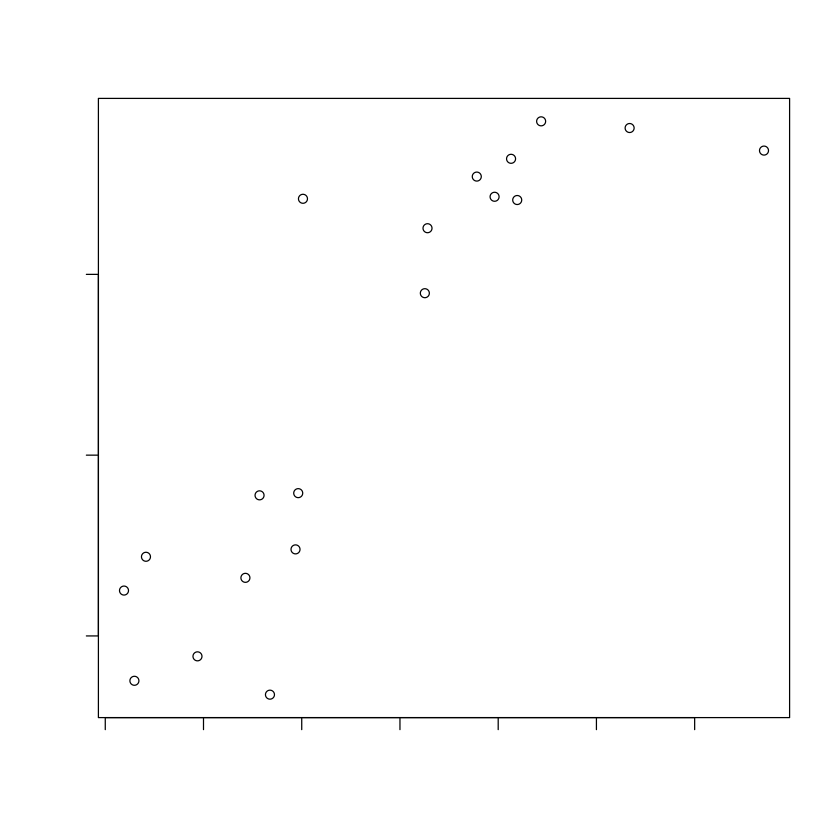

In [17]:
with(tbl.all, plot(x=lasso.asinh[idx],y=gene.cor[idx]))